In [21]:
# Victor Z
# UW-Madison, 2024
# flow cytometer data

In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load flow cytometer data
path = '/content/drive/MyDrive/StatsBookCode/Python/'
filename = path+'Data/flow_cytometer.dat'
data = np.loadtxt(filename)

In [24]:
n = len(data)
FSC = data[:, 0]
SSC = data[:, 1]

minFSC = np.min(FSC)
maxFSC = np.max(FSC)

minSSC = np.min(SSC)
maxSSC = np.max(SSC)

# Get joint pdf
# Bin data in mxm matrix
bin_width = 0.05
freqjoint, SSCedges, FSCedges = np.histogram2d(SSC, FSC, bins=[np.arange(minSSC, maxSSC + bin_width, bin_width), np.arange(minFSC, maxFSC + bin_width, bin_width)])

mSSC = len(SSCedges)
mFSC = len(FSCedges)

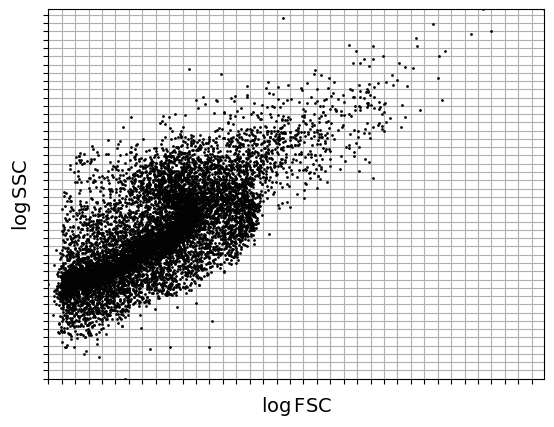

In [25]:
plt.figure(1)
plt.plot(FSC, SSC, 'ko', markerfacecolor='w', markersize=1)
plt.xlabel('$\log \mathrm{FSC}$', fontsize=14)
plt.ylabel('$\log \mathrm{SSC}$', fontsize=14)
plt.grid(True)
plt.xticks(FSCedges)
plt.yticks(SSCedges)
plt.axis([minFSC, maxFSC, minSSC, maxSSC])
plt.gca().axes.yaxis.set_ticklabels([]);
plt.gca().axes.xaxis.set_ticklabels([]);

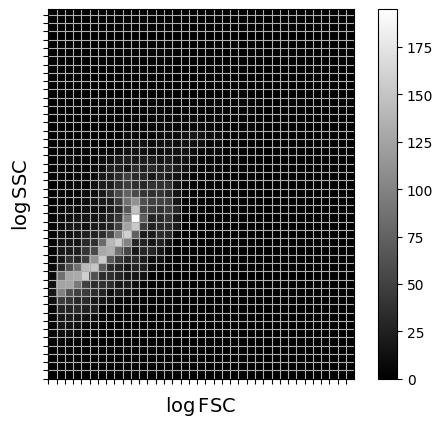

In [26]:
plt.figure(2)
c = np.linspace(0.99, 0, 64)
C = np.tile(c, (3, 1)).T
plt.imshow(freqjoint, extent=[minFSC, maxFSC, minSSC, maxSSC], cmap='gray', origin='lower')
plt.xlabel('$\log \mathrm{FSC}$', fontsize=14)
plt.ylabel('$\log \mathrm{SSC}$', fontsize=14)
plt.xticks(FSCedges)
plt.yticks(SSCedges)
plt.axis([minFSC, maxFSC, minSSC, maxSSC])
plt.colorbar()
plt.grid(True)
plt.gca().axes.yaxis.set_ticklabels([]);
plt.gca().axes.xaxis.set_ticklabels([]);

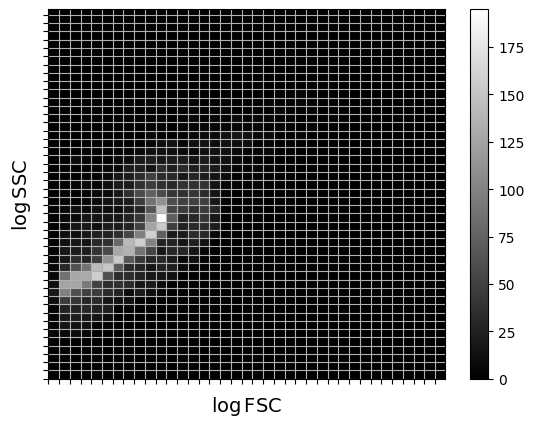

In [27]:
plt.figure(3)
plt.hist2d(FSC, SSC, bins=[FSCedges, SSCedges], cmap='gray')
plt.xlabel('$\log \mathrm{FSC}$', fontsize=14)
plt.ylabel('$\log \mathrm{SSC}$', fontsize=14)
plt.xticks(FSCedges)
plt.yticks(SSCedges)
plt.axis([minFSC, maxFSC, minSSC, maxSSC])
plt.colorbar()
plt.grid(True)
plt.gca().axes.yaxis.set_ticklabels([]);
plt.gca().axes.xaxis.set_ticklabels([]);

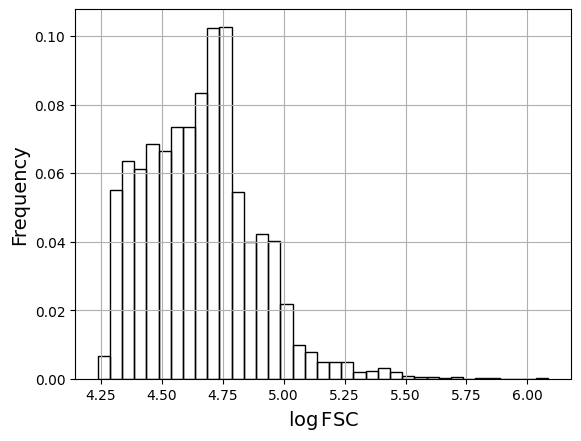

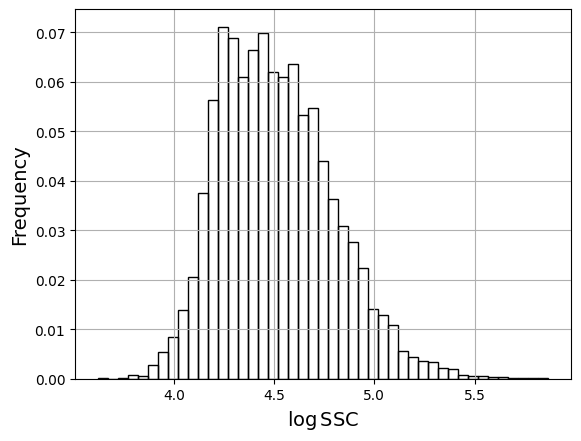

In [28]:
# Get marginal pdfs
freqSSC, SSCedges = np.histogram(SSC, bins=np.arange(minSSC, maxSSC + bin_width, bin_width))
freqFSC, FSCedges = np.histogram(FSC, bins=np.arange(minFSC, maxFSC + bin_width, bin_width))

plt.figure(4)
plt.hist(FSC, bins=FSCedges, edgecolor='black', facecolor='none', linewidth=1, weights=np.ones(len(FSC)) / n)
plt.xlabel('$\log \mathrm{FSC}$', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)


plt.figure(5)
plt.hist(SSC, bins=SSCedges, edgecolor='black', facecolor='none', linewidth=1, weights=np.ones(len(SSC)) / n)
plt.xlabel('$\log \mathrm{SSC}$', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)


<Figure size 640x480 with 0 Axes>

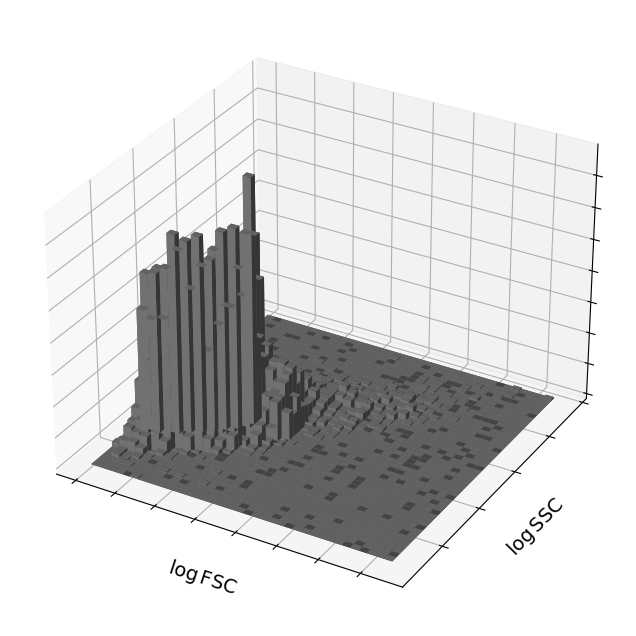

In [33]:
#visualization in 3D of histogram

plt.figure(6)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(FSC, SSC, bins=[FSCedges, SSCedges])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.025, yedges[:-1] + 0.025, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.05 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='gray')

ax.set_xlabel('$\log \mathrm{FSC}$', fontsize=14)
ax.set_ylabel('$\log \mathrm{SSC}$', fontsize=14)
ax.set_zlabel('Frequency', fontsize=14)
plt.gca().axes.yaxis.set_ticklabels([]);
plt.gca().axes.xaxis.set_ticklabels([]);
plt.gca().axes.zaxis.set_ticklabels([]);

plt.show()